In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('./output/charge_station_feature.csv')

In [8]:
data

Index(['myid', '充电站名称', '充电站所处道路属性', 'lon', 'lat', '充电站所属区域分类', '充电站类型',
       '交流桩数量', '直流桩数量', '交流桩总装机功率', '直流桩总装机功率', 'geometry', 'station_sum',
       'area', 'technology_park', 'car_park', 'supermarket', 'residential',
       'commercial', 'index'],
      dtype='object')

In [9]:
data['充电站类型'].unique()

array(['01公共', '05其他专用', '06虚拟桩群', '02公交车专用', '03出租车专用'], dtype=object)

In [10]:
data

,myid,充电站名称,充电站所处道路属性,lon,lat,充电站所属区域分类,充电站类型,交流桩数量,直流桩数量,交流桩总装机功率,直流桩总装机功率,geometry,station_sum,area,technology_park,car_park,supermarket,residential,commercial,index
0,1032,水清三村,01城市内道路,121.378263,31.116788,02居民区内部停车场,01公共,12.0,0.0,42.0,0,"POLYGON ((121.3835032382297 31.11673183681061,...",12.0,2.290014e+06,0.0,23.0,3.0,11.0,75.0,568
1,1034,水清三村公寓,01城市内道路,121.379244,31.117121,02居民区内部停车场,01公共,12.0,0.0,42.0,0,"POLYGON ((121.3844842543513 31.11706479638057,...",12.0,2.388577e+06,0.0,20.0,3.0,10.0,73.0,568
2,1047,闵行区两湾新苑,01城市内道路,121.401438,31.118889,02居民区内部停车场,01公共,0.0,1.0,0.0,204,"POLYGON ((121.4066783019228 31.11883189097273,...",1.0,8.150779e+05,0.0,3.0,0.0,6.0,18.0,349
3,1051,上海高合闵行研发基地充电站,01城市内道路,121.393382,31.119198,01充电场站,01公共,0.0,5.0,0.0,400.01,"POLYGON ((121.3986223369819 31.11914121807474,...",5.0,1.718523e+06,0.0,1.0,0.0,3.0,2.0,479
4,1053,上海交大附中闵行分校充电站,01城市内道路,121.386737,31.119321,01充电场站,05其他专用,9.0,0.0,63.0,0,"POLYGON ((121.3919773585765 31.11926448810486,...",9.0,7.206383e+05,0.0,9.0,2.0,1.0,17.0,479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6951,19609,桩企东街站（待移桩）,NaN,121.583173,31.275461,03公共机构内部停车场,01公共,1.0,0.0,7.0,0,"POLYGON ((121.5884215018835 31.27539621048879,...",1.0,3.093818e+06,0.0,19.0,4.0,13.0,350.0,44
6952,19610,车侍充电（艺飞汽车养护服务中心,NaN,121.431014,31.296962,03公共机构内部停车场,01公共,1.0,0.0,7.0,0,"POLYGON ((121.4362640619697 31.29690338973916,...",1.0,3.404897e+06,0.0,20.0,2.0,3.0,11.0,335
6953,19611,东方希杰地下车库内部员工新能源车充电站,NaN,121.508835,31.299307,01充电场站,01公共,2.0,0.0,14.0,0,"POLYGON ((121.5140850079118 31.29924520482638,...",2.0,4.983789e+06,4.0,58.0,3.0,22.0,477.0,186
6954,19612,加枫路充电站,NaN,121.605119,31.313403,03公共机构内部停车场,01公共,0.0,4.0,0.0,240,"POLYGON ((121.610369548425 31.31333724284334, ...",4.0,4.492931e+06,0.0,14.0,1.0,0.0,12.0,483


In [6]:
len(data.columns)

20

In [11]:
charge_grid = pd.read_csv('data/订单量0715.csv')
def generate_lon_lat(df):
    df['lon'] = df['经纬度编号'].str.split('-').str[0].astype(float)
    df['lat'] = df['经纬度编号'].str.split('-').str[1].astype(float)
    return df
charge_grid = generate_lon_lat(charge_grid)

In [12]:
grid_index = pd.read_csv('./output/grid_index.csv')
charge_grid = pd.merge(charge_grid,grid_index,on=['lon','lat'],how='inner')
charge_grid

,日期,充电时段,经纬度编号,充电次数,总充电量,BEV车辆数,PHEV车辆数,lon,lat,index
0,2023-07-15,22-23,121.57-31.16,90,"2,089.05",52,38,121.57,31.16,2
1,2023-07-15,0-1,121.57-31.16,22,546.27,11,11,121.57,31.16,2
2,2023-07-15,21-22,121.57-31.16,19,354.62,7,12,121.57,31.16,2
3,2023-07-15,11-12,121.57-31.16,10,83.49,2,7,121.57,31.16,2
4,2023-07-15,14-15,121.57-31.16,9,89.46,2,7,121.57,31.16,2
...,...,...,...,...,...,...,...,...,...,...
4470,2023-07-15,22-23,121.36-31.34,1,9.61,0,1,121.36,31.34,659
4471,2023-07-15,8-9,121.36-31.34,1,0.74,0,1,121.36,31.34,659
4472,2023-07-15,8-9,121.37-31.29,1,0.56,0,1,121.37,31.29,616
4473,2023-07-15,8-9,121.48-31.36,1,15.2,0,1,121.48,31.36,648


In [13]:
charge_grid.to_csv('./output/订单量0715.csv',index=None)

In [1]:
import pandas as pd

In [2]:
feature = pd.read_csv('./output/charge_station_feature.csv')

In [3]:
y = pd.read_csv('./output/订单量0712.csv')

In [4]:
feature.columns

Index(['充电站所处道路属性', '充电站所属区域分类', '充电站类型', '交流桩数量', '直流桩数量', '交流桩总装机功率',
       '直流桩总装机功率', 'station_sum', 'area', 'technology_park', 'car_park',
       'supermarket', 'residential', 'commercial', 'index'],
      dtype='object')

In [6]:
feature.drop(columns=['充电站所处道路属性', '充电站所属区域分类', '充电站类型'],inplace=True)

In [7]:
feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6956 entries, 0 to 6955
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   交流桩数量            6956 non-null   float64
 1   直流桩数量            6956 non-null   float64
 2   交流桩总装机功率         6956 non-null   float64
 3   直流桩总装机功率         6956 non-null   float64
 4   station_sum      6956 non-null   float64
 5   area             6956 non-null   float64
 6   technology_park  6956 non-null   float64
 7   car_park         6956 non-null   float64
 8   supermarket      6956 non-null   float64
 9   residential      6956 non-null   float64
 10  commercial       6956 non-null   float64
 11  index            6956 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 652.2 KB


In [12]:
y['time'] = y['充电时段'].apply(lambda x: int(x.split('-')[0]))
y

,日期,充电时段,经纬度编号,充电次数,总充电量,BEV车辆数,PHEV车辆数,lon,lat,index,time
0,2023-07-12,0-1,121.46-31.34,100,"3,046.6",96,4,121.46,31.34,0,0
1,2023-07-12,22-23,121.46-31.34,69,"1,932.46",59,9,121.46,31.34,0,22
2,2023-07-12,5-6,121.46-31.34,66,"2,028.03",63,1,121.46,31.34,0,5
3,2023-07-12,14-15,121.46-31.34,63,"1,910.07",56,4,121.46,31.34,0,14
4,2023-07-12,11-12,121.46-31.34,32,637.77,27,3,121.46,31.34,0,11
...,...,...,...,...,...,...,...,...,...,...,...
4565,2023-07-12,8-9,121.35-31.29,1,0.93,0,1,121.35,31.29,664,8
4566,2023-07-12,8-9,121.64-31.29,1,6.48,0,1,121.64,31.29,665,8
4567,2023-07-12,8-9,121.36-31.31,1,2.41,0,1,121.36,31.31,666,8
4568,2023-07-12,8-9,121.48-31.13,1,0.74,0,1,121.48,31.13,667,8


In [38]:
y['time'].unique()

array([ 0, 22,  5, 14, 11, 19, 21,  8], dtype=int64)

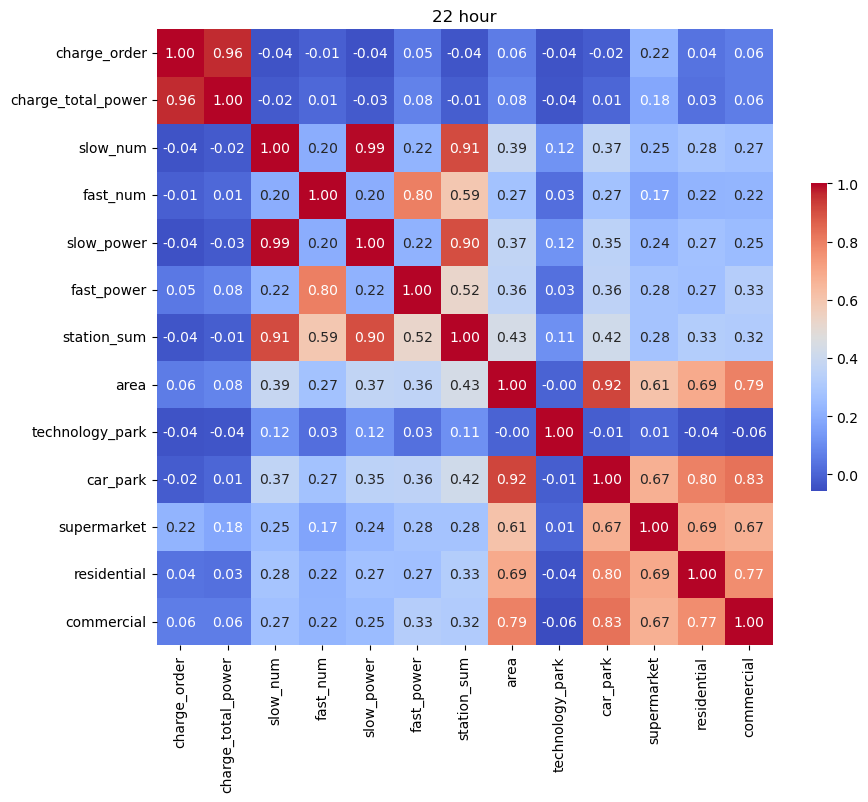

In [45]:
time = 22
y_hour = y[y['time']==time]
y_hour = y_hour[['index','充电次数','总充电量']]
agg_feature = pd.merge(feature,y_hour,on=['index'],how='left')
agg_feature = agg_feature.groupby(['index','充电次数','总充电量']).sum().reset_index()
agg_feature['总充电量']=agg_feature['总充电量'].str.replace(',', '', regex=False).astype(float)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
agg_feature.rename(columns={'充电次数':'charge_order','交流桩数量':'slow_num','直流桩数量':'fast_num',
                            '交流桩总装机功率':'slow_power','直流桩总装机功率':'fast_power','总充电量':'charge_total_power'},inplace=True)
# 假设df是你的DataFrame
agg_feature.drop(columns=['index'],inplace=True)
# 计算相关系数矩阵
corr_matrix = agg_feature.corr()

# 使用seaborn创建热力图
plt.figure(figsize=(10, 8))  # 可以根据需要调整图形大小
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .5})
plt.title(f'{time} hour')
# 显示图形
plt.show()

In [48]:
test = agg_feature[['charge_order', 'charge_total_power', 'slow_num', 'fast_num',
       'slow_power', 'fast_power']]

In [49]:
test

,charge_order,charge_total_power,slow_num,fast_num,slow_power,fast_power
0,69.0,1932.46,583.0,2.0,4081.0,120.0
1,100.0,2144.80,40.0,60.0,262.5,3600.0
2,98.0,2253.42,26.0,53.0,147.0,1985.0
3,97.0,2603.53,80.0,2.0,413.0,80.0
4,85.0,1848.78,58.0,0.0,449.0,0.0
...,...,...,...,...,...,...
583,1.0,18.10,30.0,12.0,210.0,600.0
584,1.0,10.32,19.0,0.0,133.0,0.0
585,1.0,64.00,2.0,1.0,14.0,20.0
586,1.0,9.58,1.0,0.0,7.0,0.0


In [50]:
agg_feature

,charge_order,charge_total_power,slow_num,fast_num,slow_power,fast_power,station_sum,area,technology_park,car_park,supermarket,residential,commercial
0,69.0,1932.46,583.0,2.0,4081.0,120.0,585.0,4.792965e+07,60.0,102.0,34.0,47.0,1120.0
1,100.0,2144.80,40.0,60.0,262.5,3600.0,100.0,3.723831e+07,0.0,39.0,56.0,141.0,656.0
2,98.0,2253.42,26.0,53.0,147.0,1985.0,79.0,4.095205e+07,0.0,100.0,34.0,216.0,677.0
3,97.0,2603.53,80.0,2.0,413.0,80.0,82.0,7.382803e+07,0.0,246.0,48.0,285.0,775.0
4,85.0,1848.78,58.0,0.0,449.0,0.0,58.0,2.862958e+07,0.0,118.0,33.0,92.0,411.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,1.0,18.10,30.0,12.0,210.0,600.0,42.0,5.598016e+06,0.0,2.0,0.0,4.0,2.0
584,1.0,10.32,19.0,0.0,133.0,0.0,19.0,5.245669e+06,0.0,2.0,5.0,4.0,40.0
585,1.0,64.00,2.0,1.0,14.0,20.0,3.0,1.040213e+06,0.0,8.0,1.0,7.0,11.0
586,1.0,9.58,1.0,0.0,7.0,0.0,1.0,1.005438e+05,0.0,2.0,1.0,0.0,6.0


In [13]:
import pandas as pd 
data = pd.read_csv('./output/中促盟充电站特征.csv')
data.drop(columns=['充电站名称','lon','lat','geometry'],inplace=True)


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19590 entries, 0 to 19589
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   myid             19590 non-null  int64  
 1   充电站所处道路属性        19035 non-null  object 
 2   充电站所属区域分类        19590 non-null  object 
 3   充电站类型            19590 non-null  object 
 4   交流桩数量            19398 non-null  float64
 5   直流桩数量            19052 non-null  float64
 6   交流桩总装机功率         19398 non-null  float64
 7   直流桩总装机功率         19040 non-null  object 
 8   station_sum      18861 non-null  float64
 9   area             19590 non-null  float64
 10  technology_park  19590 non-null  float64
 11  car_park         19590 non-null  float64
 12  supermarket      19590 non-null  float64
 13  residential      19590 non-null  float64
 14  commercial       19590 non-null  float64
dtypes: float64(10), int64(1), object(4)
memory usage: 2.2+ MB


In [16]:
data['直流桩总装机功率'] = data['直流桩总装机功率'].astype(str)
data['直流桩总装机功率'] = data['直流桩总装机功率'].apply(lambda x: x.split('-')[0])
data['直流桩总装机功率'] = data['直流桩总装机功率'].astype(float)

In [19]:
data['充电站所处道路属性'] = data['充电站所处道路属性'].fillna('unKnown')

In [28]:
data['交流桩数量'] = data['交流桩数量'].fillna(0)
data['直流桩数量'] = data['直流桩数量'].fillna(0)
data['交流桩总装机功率'] = data['交流桩总装机功率'].fillna(0)
data['直流桩总装机功率'] = data['直流桩总装机功率'].fillna(0)
data['station_sum'] = data['直流桩数量'] + data['交流桩数量']
data

,myid,充电站所处道路属性,充电站所属区域分类,充电站类型,交流桩数量,直流桩数量,交流桩总装机功率,直流桩总装机功率,station_sum,area,technology_park,car_park,supermarket,residential,commercial
0,0,01城市内道路,01充电场站,05其他专用,6.0,0.0,42.0,0.0,6.0,4.578910e+05,0.0,2.0,2.0,5.0,16.0
1,1,01城市内道路,01充电场站,05其他专用,6.0,0.0,42.0,0.0,6.0,6.692213e+05,0.0,1.0,3.0,7.0,27.0
2,2,01城市内道路,10大型建筑物配建停车场,01公共,12.0,0.0,42.0,0.0,12.0,1.414586e+06,0.0,5.0,8.0,12.0,54.0
3,3,01城市内道路,01充电场站,01公共,2.0,1.0,14.0,60.0,3.0,4.275121e+05,0.0,0.0,0.0,0.0,1.0
4,4,01城市内道路,01充电场站,01公共,5.0,1.0,35.0,15.0,6.0,4.275121e+05,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19585,19611,unKnown,01充电场站,01公共,2.0,0.0,14.0,0.0,2.0,4.983789e+06,4.0,58.0,3.0,22.0,477.0
19586,19612,unKnown,03公共机构内部停车场,01公共,0.0,4.0,0.0,240.0,4.0,4.492931e+06,0.0,14.0,1.0,0.0,12.0
19587,19613,unKnown,07交通枢纽公共停车场,01公共,108.0,0.0,756.0,0.0,108.0,1.616420e+06,0.0,5.0,2.0,8.0,10.0
19588,19615,unKnown,05写字楼内部停车场,01公共,2.0,0.0,14.0,0.0,2.0,5.387258e+05,0.0,0.0,0.0,0.0,0.0


In [30]:
data['station_sum'].unique()

array([6.000e+00, 1.200e+01, 3.000e+00, 1.000e+00, 4.000e+00, 1.100e+01,
       1.700e+01, 1.500e+01, 4.000e+01, 1.800e+01, 1.600e+01, 5.000e+00,
       9.000e+00, 1.400e+01, 8.000e+00, 9.000e+01, 4.200e+01, 7.000e+00,
       1.000e+01, 3.100e+01, 2.400e+01, 1.300e+01, 2.000e+00, 3.000e+01,
       1.000e+02, 3.400e+01, 1.420e+02, 2.000e+01, 3.800e+01, 6.500e+01,
       2.200e+01, 2.600e+01, 5.900e+01, 2.140e+02, 1.730e+02, 5.000e+01,
       2.500e+01, 4.400e+01, 5.600e+01, 2.900e+01, 6.000e+01, 2.700e+01,
       6.400e+01, 0.000e+00, 2.100e+01, 1.320e+02, 7.000e+01, 2.800e+01,
       8.700e+01, 1.530e+02, 7.400e+01, 3.500e+01, 4.500e+01, 3.200e+01,
       2.300e+01, 5.400e+01, 3.600e+01, 6.200e+01, 8.000e+01, 5.100e+01,
       9.700e+01, 3.300e+01, 1.890e+02, 1.900e+01, 5.700e+01, 1.050e+02,
       8.800e+01, 7.200e+01, 3.700e+01, 9.600e+01, 4.600e+01, 8.600e+01,
       4.700e+01, 1.810e+02, 1.790e+02, 1.200e+02, 8.400e+01, 6.600e+01,
       5.300e+01, 5.800e+01, 5.200e+01, 1.020e+02, 

In [31]:
data.to_csv('./output/需要预测充电订单.csv',index=None)

In [24]:
test = pd.read_csv('./output/charge_feature_修复.csv')
test['充电站所处道路属性'].unique(), test['充电站所属区域分类'].unique()
test['充电站类型'].unique()

array(['01公共', '05其他专用', '06虚拟桩群', '02公交车专用', '03出租车专用'], dtype=object)

In [27]:
test.isna().any()

充电站所处道路属性          False
充电站所属区域分类          False
充电站类型              False
交流桩数量              False
直流桩数量              False
交流桩总装机功率           False
直流桩总装机功率           False
station_sum        False
index              False
area               False
technology_park    False
car_park           False
supermarket        False
residential        False
commercial         False
dtype: bool